# Multiple Linear Regression
## Housing Case Study

#### Problem Statement:

A US bike-sharing provider BoomBikes required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Essentially, the company wants —


- To identify Which variables are significant in predicting the demand for shared bikes.

- To create a linear model that quantitatively relates How well those variables describe the bike demands

- To know the accuracy of the model

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importing day.csv
demand = pd.read_csv("day.csv")
# setting index for dataset as mentioned in the dictionery
demand = demand.set_index('instant')

In [4]:
import datetime as dt
# convert dteday data type to date time
demand['dteday'] = pd.to_datetime(demand['dteday'])
# Linear regression doesn't work on date data. 
# Therefore we need to convert it into numerical value.The following code will convert the date into numerical value:
demand['dteday'] = demand['dteday'].map(dt.datetime.toordinal)
# to again revert ordinal = 737425; date = datetime.date.fromordinal(ordinal)
# Check the head of the dataset
demand.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,736695,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,736726,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,736754,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,736785,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,736815,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the dataframe

In [5]:
demand.shape

(730, 15)

In [6]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.2 KB


In [7]:
demand.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    int64  
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 91.2 KB


convert below to categorical cariable from considering given dictionary

    1. Season
    2. weathersit
    3. mnth
    4. weekday
    5. yr

In [8]:
demand['season'] = demand['season'].map({1:'spring', 2:'summer',3:'fall',4:'winter'})
demand['mnth'] = demand['mnth'].map({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may', 6:'jun',7:'jul',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
demand['yr'] = demand['yr'].map({0:'2018', 1:'2019'})
demand['weathersit'] = demand['weathersit'].map({1:'clean_cloud',2:'mist_cloud',3:'light_rain',4:'heavy_rain'})
demand['weekday'] = demand['weekday'].map({0:'sundy', 1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'friday',6:'saturday'})


In [9]:
# remove the columns which are not usefull casual, registered are highly correlated to each other hence remove casual and registered
# dteday is considered as mnth and yr they are highly correlated lastly temp and atemp arehighly correlated
demand = demand.drop(['dteday','casual','registered','temp'],axis=1)

demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,
1,spring,2018,jan,0,saturday,0,mist_cloud,18.18125,80.5833,10.749882,985
2,spring,2018,jan,0,sundy,0,mist_cloud,17.68695,69.6087,16.652113,801
3,spring,2018,jan,0,monday,1,clean_cloud,9.47025,43.7273,16.636703,1349
4,spring,2018,jan,0,tuesday,1,clean_cloud,10.60610,59.0435,10.739832,1562
5,spring,2018,jan,0,wednesday,1,clean_cloud,11.46350,43.6957,12.522300,1600


In [10]:
demand.describe()

,holiday,workingday,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,23.726322,62.765175,12.763620,4508.006849
std,0.167266,0.465405,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

We'll visualise our data using `matplotlib` and `seaborn`.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<AxesSubplot:xlabel='yr', ylabel='cnt'>

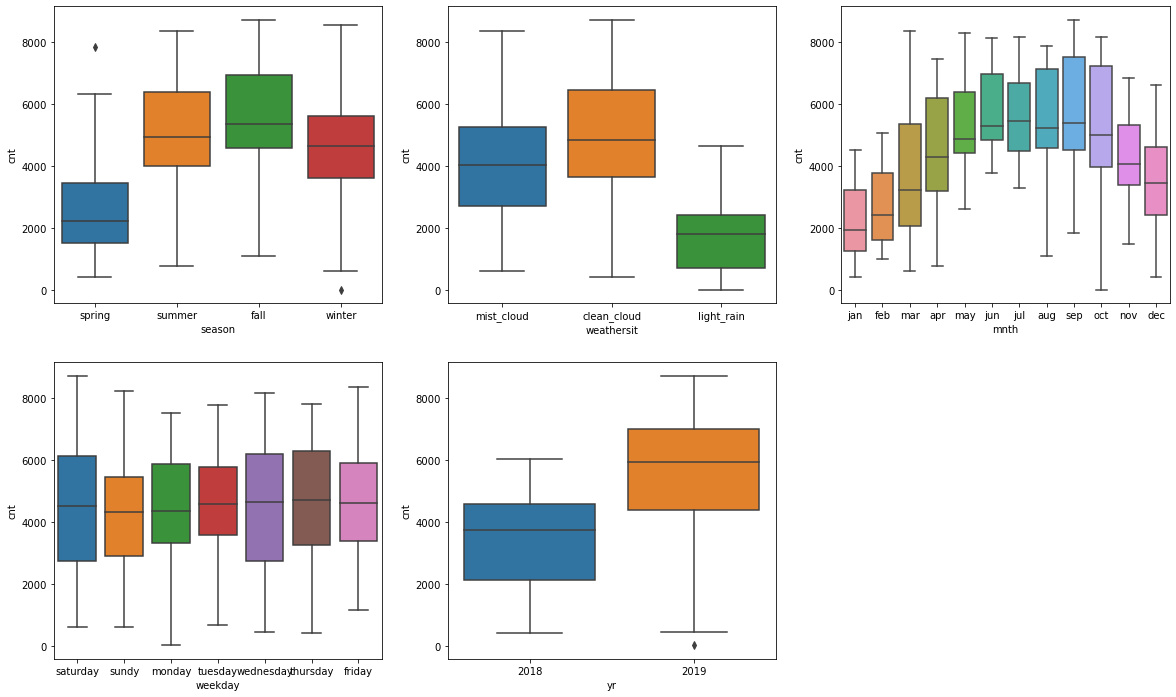

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = demand)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = demand)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = demand)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = demand)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = demand)

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `weathersit` as the hue.

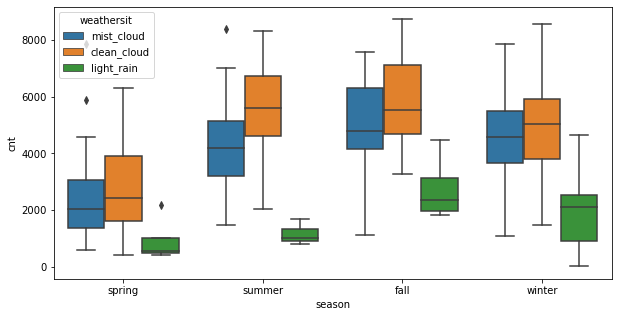

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = demand)
plt.show()

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

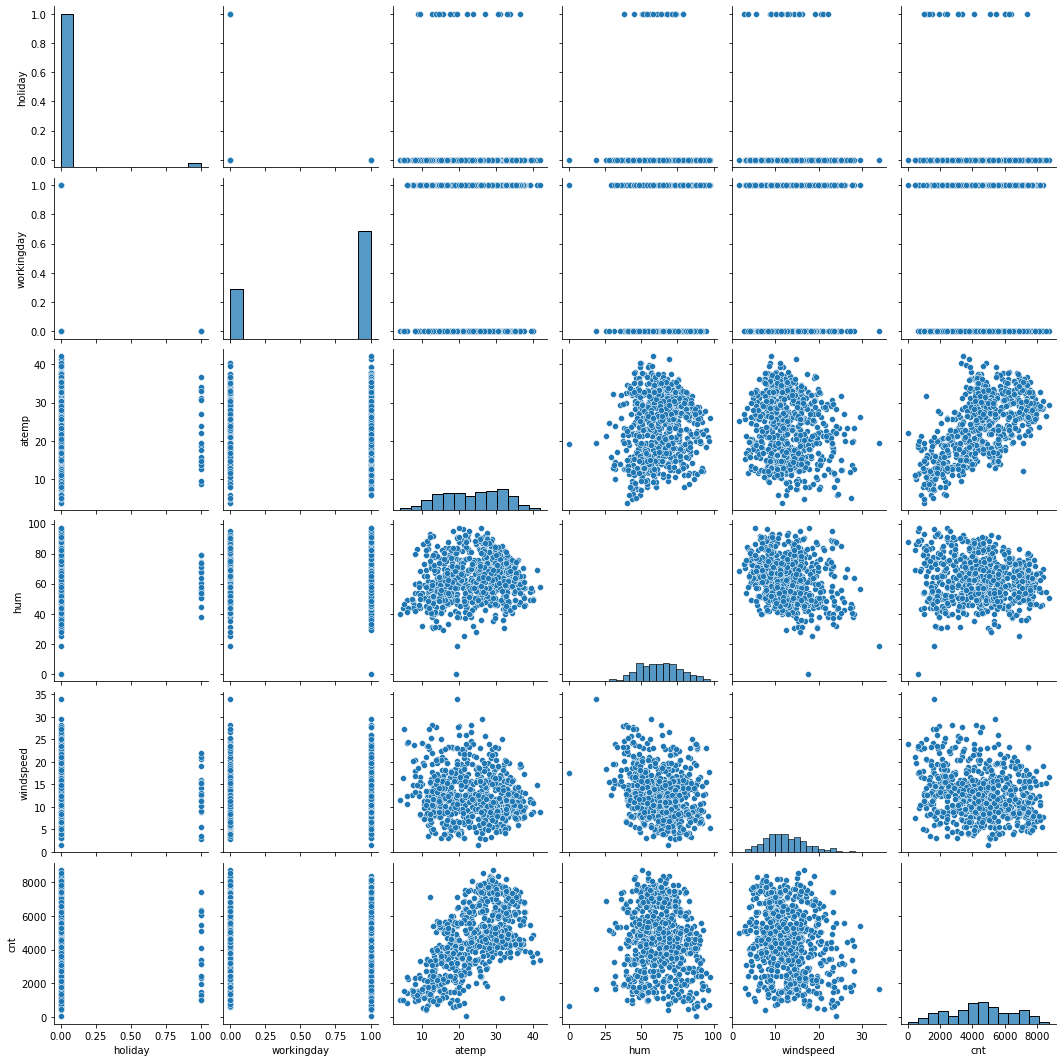

In [14]:
sns.pairplot(demand)
plt.show()

## Step 3: Data Preparation

- You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary).
- so converted such feature values into categorical string values before proceeding with model building.

### Dummy Variables

- create dummy variables for fallowing:
    1. Season
    2. weathersit
    3. mnth
    4. weekday
    5. yr

In [15]:
# Get the dummy variables for the feature 'season', 'weathersit', 'weekdayand' store it in a new variable - 'season'
season = pd.get_dummies(demand['season'], drop_first = True)
weathersit = pd.get_dummies(demand['weathersit'], drop_first = True)
mnth = pd.get_dummies(demand['mnth'], drop_first = True)
weekday = pd.get_dummies(demand['weekday'], drop_first = True)
yr = pd.get_dummies(demand['yr'])

In [16]:
# Add the results to the original demand dataframe
demand = pd.concat([demand, season, weathersit, mnth, weekday, yr], axis = 1)

# Now let's see the head of our dataframe.
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,monday,saturday,sundy,thursday,tuesday,wednesday,2018,2019
instant,,,,,,,,,,,,,,,,,,,,,
1,spring,2018,jan,0,saturday,0,mist_cloud,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,1,0
2,spring,2018,jan,0,sundy,0,mist_cloud,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,1,0
3,spring,2018,jan,0,monday,1,clean_cloud,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,1,0
4,spring,2018,jan,0,tuesday,1,clean_cloud,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,1,0
5,spring,2018,jan,0,wednesday,1,clean_cloud,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,1,0


In [17]:
# Drop 'season' and 'weathersit' as we have created the dummies for it
demand.drop(['season','weathersit','mnth','yr','weekday'], axis = 1, inplace = True)
demand.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,monday,saturday,sundy,thursday,tuesday,wednesday,2018,2019
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


## Splitting the Data into Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(demand, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
df_train.columns

Index(['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'light_rain', 'mist_cloud', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'monday',
       'saturday', 'sundy', 'thursday', 'tuesday', 'wednesday', '2018',
       '2019'],
      dtype='object')

In [23]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,...,oct,sep,monday,saturday,sundy,thursday,tuesday,wednesday,2018,2019
instant,,,,,,,,,,,,,,,,,,,,,
654,0.0,1.0,0.501133,0.575354,0.300794,0.864243,0,0,1,0,...,1,0,0,0,0,0,1,0,0,1
577,0.0,1.0,0.766351,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
427,0.0,0.0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
729,0.0,0.0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
483,0.0,0.0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [24]:
df_train.describe()

,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,...,oct,sep,monday,saturday,sundy,thursday,tuesday,wednesday,2018,2019
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.492157,0.507843
std,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.500429,0.500429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


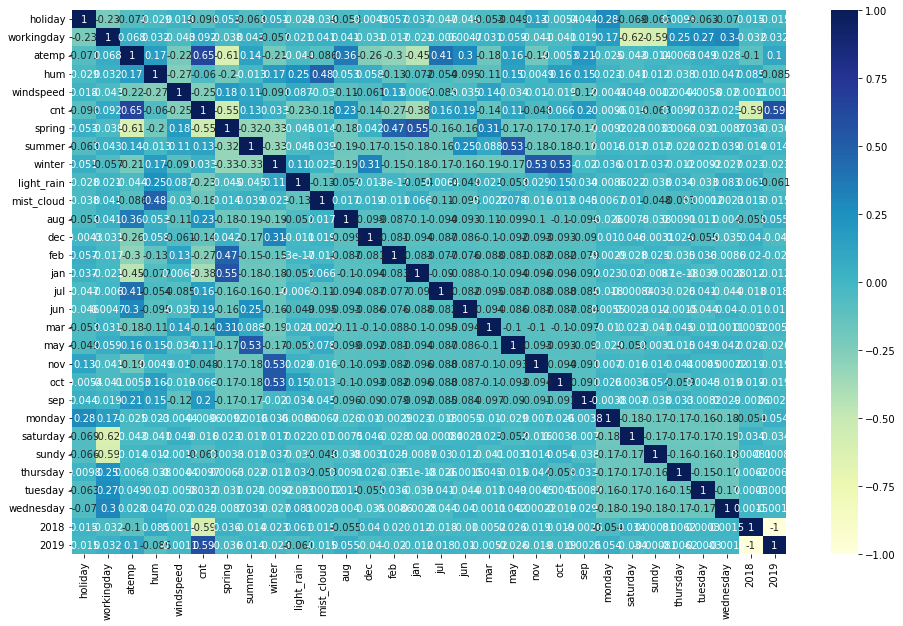

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [26]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', False, 8),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 12),
 ('winter', False, 3),
 ('light_rain', True, 1),
 ('mist_cloud', True, 1),
 ('aug', False, 13),
 ('dec', False, 6),
 ('feb', False, 9),
 ('jan', False, 4),
 ('jul', True, 1),
 ('jun', False, 16),
 ('mar', False, 20),
 ('may', False, 11),
 ('nov', False, 5),
 ('oct', False, 18),
 ('sep', False, 2),
 ('monday', False, 14),
 ('saturday', False, 7),
 ('sundy', False, 10),
 ('thursday', False, 17),
 ('tuesday', False, 15),
 ('wednesday', False, 19),
 ('2018', True, 1),
 ('2019', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'atemp', 'hum', 'windspeed', 'spring', 'light_rain',
       'mist_cloud', 'jul', '2018', '2019'],
      dtype='object')

In [31]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'monday', 'saturday', 'sundy',
       'thursday', 'tuesday', 'wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [32]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [33]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [34]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [37]:
#Let's see the summary of our linear model
print(lm.summary())
print(X_train_rfe.columns)
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.59e-183
Time:                        11:51:40   Log-Likelihood:                 484.40
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     500   BIC:                            -906.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3273      0.020     16.323      0.0

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [38]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,2019,26.53
8,2018,26.10
1,atemp,2.03
2,hum,1.82
4,spring,1.65
6,mist_cloud,1.53
5,light_rain,1.24
7,jul,1.24
3,windspeed,1.17
0,holiday,1.01


### let us identify significant variable considering vif and p value
 
priority as fallows:
   1. VIF>5 and p>0.05
   2. VIF<5 and p>0.05
   3. VIF>5 and p<0.05

According to the above priority below variables has to be drop one by one and create model
   below are insignificant variable in presence of other variable.
       - light_rain

In [39]:
X_train_rfe = X_train_rfe.drop(['2019'], axis = 1)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)       
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     263.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.59e-183
Time:                        11:53:35   Log-Likelihood:                 484.40
No. Observations:                 510   AIC:                            -948.8
Df Residuals:                     500   BIC:                            -906.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6071      0.030     20.067      0.0

,Features,VIF
2,hum,17.05
1,atemp,11.46
3,windspeed,3.84
6,mist_cloud,2.14
8,2018,2.00
4,spring,1.82
7,jul,1.34
5,light_rain,1.20
0,holiday,1.04


In [40]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
print(lm.summary())

# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)       
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     289.7
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.80e-182
Time:                        11:54:15   Log-Likelihood:                 478.99
No. Observations:                 510   AIC:                            -940.0
Df Residuals:                     501   BIC:                            -901.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5335      0.020     26.090      0.0

,Features,VIF
1,atemp,3.76
2,windspeed,3.73
7,2018,1.84
3,spring,1.52
5,mist_cloud,1.50
6,jul,1.27
4,light_rain,1.06
0,holiday,1.03


## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
y_train_price = lm.predict(X_train_lm)

In [42]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

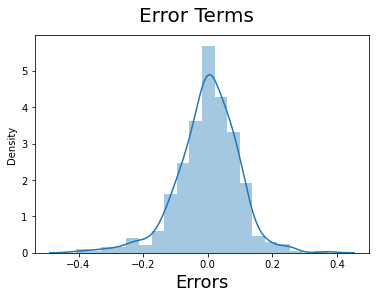

In [43]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets


In [44]:
num_vars = ['holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [45]:
y_test = df_test.pop('cnt')
X_test = df_test

In [53]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [54]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Making Evaluation
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

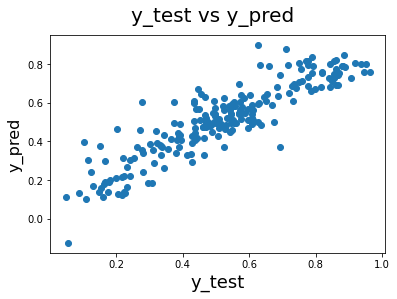

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

cnt = 0.534 - 0.084 x holiday + 0.433 x atemp - 0.145 x windspeed - 0.146 x spring - 0.27 x light_rain - 0.0806 x mist_cloud - 0.0815 x jul - 0.235 x 2018th

Overall we have a decent model, but we also acknowledge that we could do better.

We have a couple of options:

Add new features (bathrooms/bedrooms, area/stories, etc.)
Build a non-linear model

In [56]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8021318641422466